In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
V = np.array([0.251, 0.500, 1.002, 1.999, 3.001, 4.001, 5.002, 6.000, 7.00, 8.00, 9.00, 10.00])
i = np.array([0.003, 0.006, 0.012, 0.025, 0.037, 0.049, 0.062, 0.074, 0.087, 0.099, 0.112, 0.125])
errV = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

In [4]:
y = V
x = i
dy = errV

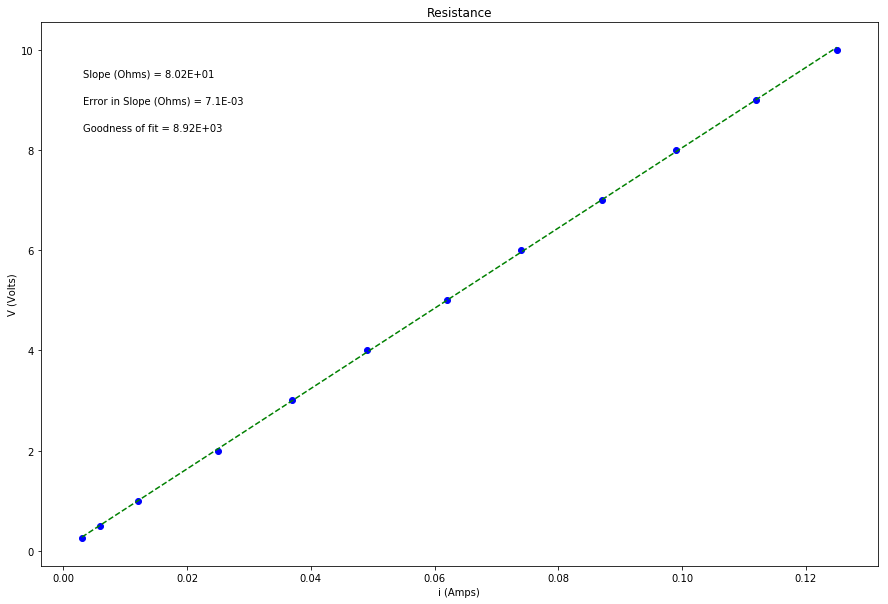

In [8]:
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
fit = b+m*x
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
D=Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2))
db = np.sqrt(1/D*sum(x**2/dy**2))
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
N = LLSFD2(x,y,dy)
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
plt.xlabel('i (Amps)')
plt.ylabel('V (Volts)')
plt.title('Resistance')
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
plt.annotate('Slope (Ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()